## Praca domowa 4

#### Autorka: Agata Kopyt

### Zadanie 1 (1.5 pkt)

Używając funkcji z pakietu `numpy` oraz `pandas` odpowiedz na poniższe pytania dotyczące zbioru danych o grach.

a) Wybierz gry, które zostały wydane po 2015 roku przez Nintendo oraz ich sprzedaż w Ameryce była niższa niż w Europie.  

b) Jak rodzaj gry zarobił najwięcej w roku 2010?

c) Jakie typy gier sprzedają się średnio lepiej w Japonii niż w Europie? Jakie to typy gier i jaka jest ta wartość średnia. Wynikiem powinna być tabelka posortowana względem średnich. Nazwij kolumny `Typ Gry` i `Średnia sprzedaż w Japonii`.


In [6]:
import pandas as pd
import numpy as np

df = pd.read_csv("https://raw.githubusercontent.com/R-Ladies-Warsaw/PoweR/master/Cz%C4%99%C5%9B%C4%87%202%20-%20Formatowanie%20danych/Python/data/vgsales.csv",
                delimiter = ",").dropna().reset_index(drop = True)
df = df.drop("Rank", axis = 1)

In [7]:
# Rozwiązanie a)
a = df.loc[(df.Year>2015 )& (df.Publisher =="Nintendo")&(df.NA_Sales<df.EU_Sales)][['Name','Platform']].reset_index(drop=True)
a

,Name,Platform
0,Mario & Sonic at the Rio 2016 Olympic Games,3DS
1,Mario & Sonic at the Rio 2016 Olympic Games,WiiU
2,Teddy Together,3DS


In [8]:
# Rozwiązanie b)
b = df.loc[df.Year==2010].groupby('Genre').Global_Sales.agg('sum').sort_values(ascending = False).head(1).to_frame().reset_index()
# b.Global_Sales.max()
b

,Genre,Global_Sales
0,Action,117.64


In [9]:
# Rozwiązanie c)
df2 = df.groupby('Genre')[['EU_Sales', 'JP_Sales']].agg('mean')
c = df2.loc[df2.EU_Sales < df2.JP_Sales].drop('EU_Sales', axis=1).sort_values(by ="JP_Sales", ascending=True).reset_index().rename(columns = {'JP_Sales':'Średnia sprzedaż w Japonii', 'Genre':'Typ Gry'})
c

,Typ Gry,Średnia sprzedaż w Japonii
0,Strategy,0.073284
1,Puzzle,0.099439
2,Role-Playing,0.238293


### Zadanie 2 (3.5 pkt)

Wykorzystując narzędzie do wizualizacji w Pythonie (matplotlib, seaborn) należy poprawić wykres, który był rozwiązaniem pracy domowej 2 (najlepiej poprawić swoją pracę domową, ale można też cudzą).

Rozwiązanie powinno zawierać:

1) oryginalny wykres wraz ze źródłem

2) wykres w ggplot2 wraz z linkiem do pracy domowej w której się on pojawił (kod nie jest potrzebny)

3) poprawiony wykres z punktu 2) w Pythonie

4) uzasadnienie, czemu wykres w Pythonie jest lepszy od dwóch pozostałych.

### Rozwiązanie zadania 2

#### 1)

Źródło: [Rezerwa Ogólna i rezerwy celowe - stan na 30 września 2021r.](https://www.gov.pl/web/finanse/wykresy-za-2021-r)

Wizualizacja do poprawy
![Wizualizacja do poprawy](Wizualizacja.png "Title")

#### 2)

Wykres poprawiony w ggplot2

[Praca domowa, z której został zaczerpnięty](https://github.com/mini-pw/2022Z-DataVisualizationTechniques/tree/main/homeworks/hw2/Kopyt_Agata/Kopyt_Agata_hw2.pdf)
![Wykres poprawiony w ggplot2](Wykres_ggplot2.png "Title")

#### 3) 

Wykres poprawiony w Pythonie

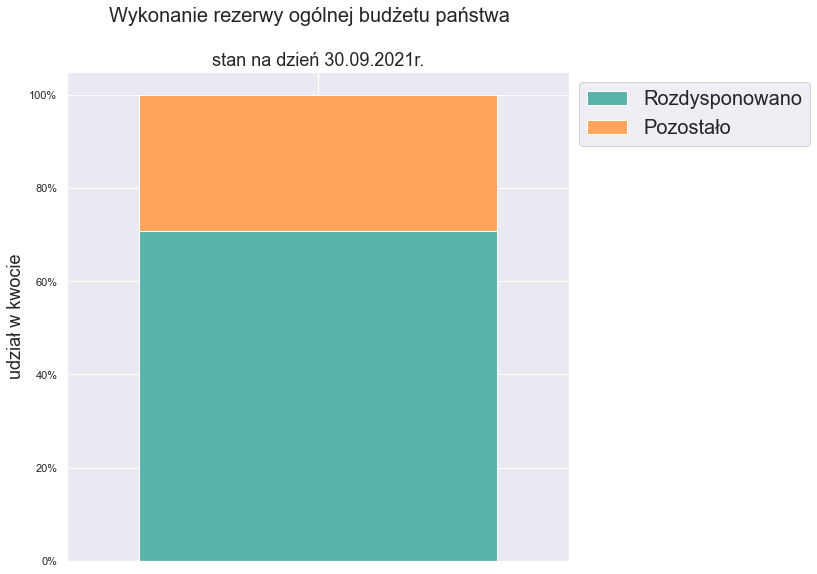

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
sns.set(rc = {'figure.figsize': (9,9)})

df = pd.read_csv('RezerwaOgolna', encoding='unicode_escape')
df.at[1,'stanRezerwy']='Pozostało'
df.kwota = df.kwota/df.kwota.sum()

fig, ax = plt.subplots()
ax.bar('stanRezerwy', df.iat[0,1],align='center', label=df.iat[0,0], color=("#5AB4AC"))
ax.bar('stanRezerwy', df.iat[1,1], align='center', bottom=df.iat[0,1],
       label=df.iat[1,0],color=("#ffa65c"))

ax.legend(bbox_to_anchor=(1, 1),prop={"size":20})
ax.set(xticklabels=[])
plt.suptitle("Wykonanie rezerwy ogólnej budżetu państwa", size =20)
plt.title("stan na dzień 30.09.2021r.", size =18)
plt.ylabel('udział w kwocie',size = 18)
ax.yaxis.set_major_formatter(PercentFormatter(1))
plt.margins(x=0.2,y=0.05)

plt.show()

#### 4)

Wykres utworzony w Pythonie jest lepszy od wyykresu początkowego ze względu na te same czynniki (wspomniane w [Pracy domowej nr2](https://github.com/mini-pw/2022Z-DataVisualizationTechniques/tree/main/homeworks/hw2/Kopyt_Agata/Kopyt_Agata_hw2.pdf) ) co wykres utworzony w R.
Natomiast pythonowa wizualizacja jest bardziej przystępna od r-owej, bo słupek zaczyna się "u podstawy wykresu" i  nie ma dolnego marginesu. Mimo wszystko uważam, że składnia w ggplocie jest bardziej zwięzła i intuicyjna, a dolny margines nie jest już problemem, bo nauczyłam się go usuwać :)